# **K-Means**

In this section, an algorithm and complementary analysis will be carried out for the Lab 1 task.

The objective of the project will be to apply the k-Means algorithm to a given data set and compare the results obtained with those of a similar study.



# **Dataset**

The given data set contains information about the levels of expression on of several genes in yeast during the sporulation process
(a process already explained previously in the project). Expression levels are measured at 7 time intervals. That is,
information is collected about how gene expression varies over time at different stages of the sporulation process.
The main objective is to use gene expression data to group genes into different groups or clusters. These clusters
should reflect similar behaviors or expression patterns over time, which could be indicative that these genes play
similar roles at different stages of sporulation. These groupings may help identify common biological functions or specific regulations during these phases.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
import gspread_dataframe as df


In [ ]:
# Read the CSV file
data = pd.read_csv("sporulation-filtered.csv", sep='\t', decimal=',')

# Delete the first column and the last two rows
bounded_data = data.iloc[1:-2, 1:473]

print(bounded_data)

           t0      t0,5        t2        t5        t7        t9     t11,5
1    0.955552 -1.489560 -0.499057 -0.099143 -0.674453  1.414381  0.392280
2    1.454598 -0.735149 -0.073602 -0.618896 -0.789697  1.391507 -0.628760
3    1.698578 -1.268638 -0.375511  0.996817 -0.319158 -0.344837 -0.387251
4    1.302831 -1.338633 -0.555163 -0.101402 -0.674167  1.317301  0.049233
5    1.431937 -1.819908  0.056708  0.628218 -0.461532  0.001474  0.163103
..        ...       ...       ...       ...       ...       ...       ...
469  1.473570 -0.980588  0.187547 -0.775976 -1.067287  0.126038  1.036696
470  1.543327 -1.090000 -0.374713 -0.780946 -0.671057  0.308319  1.065071
471  1.855230 -0.550056 -0.264951 -1.042622 -0.729874 -0.019525  0.751798
472  1.785611 -0.406223 -0.895333 -0.585125 -0.816870  0.003997  0.913943
473  1.552631 -0.019515 -0.392120 -1.218152 -0.896972 -0.092712  1.066840

[473 rows x 7 columns]


# **Data preprocessing**


## **Data imputation**



In order to apply the K-Means algorithm, it is necessary that there be no null value. Therefore, it is essential to impute the data.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
bounded_data_clean = imputer.fit_transform(bounded_data)
print (bounded_data_clean)

[[ 0.955552 -1.48956  -0.499057 ... -0.674453  1.414381  0.39228 ]
 [ 1.454598 -0.735149 -0.073602 ... -0.789697  1.391507 -0.62876 ]
 [ 1.698578 -1.268638 -0.375511 ... -0.319158 -0.344837 -0.387251]
 ...
 [ 1.85523  -0.550056 -0.264951 ... -0.729874 -0.019525  0.751798]
 [ 1.785611 -0.406223 -0.895333 ... -0.81687   0.003997  0.913943]
 [ 1.552631 -0.019515 -0.39212  ... -0.896972 -0.092712  1.06684 ]]


## **Data Normalizing**

It is recommended to normalize data when values are measured on different scales. Normalization adjusts values from different scales to a common scale. One approach is to use MinMaxScaler, which scales the dataset’s features to a range between 0,1. Alternatively, you can use other methods like standardization, which transforms the data to have a mean of 0 and a variance of 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
bounded_data_normalized = scaler.fit_transform(bounded_data_clean)
print(bounded_data_normalized)

[[0.71419262 0.15262398 0.29266416 ... 0.23332856 0.95508644 0.52394632]
 [0.82537218 0.34931106 0.43487162 ... 0.1931379  0.94659543 0.24492424]
 [0.87972706 0.2102219  0.33395916 ... 0.35723555 0.30205078 0.31092199]
 ...
 [0.91462665 0.39756778 0.37091361 ... 0.21400082 0.42280917 0.62219267]
 [0.89911664 0.43506736 0.16020972 ... 0.18366148 0.43154072 0.66650243]
 [0.84721238 0.53588835 0.32840763 ... 0.15572639 0.39564157 0.70828496]]


# **K-Means implementation**

To apply the k-means algorithm for clustering the data, we will use the **elbow method** to determine the optimal number of clusters
𝑘
k. The **elbow method** involves running k-means with different values of
𝑘
k, and for each value, calculating the sum of squared errors (SSE), which measures the variability within each cluster. When we plot
𝑘
k against SSE, we observe a decreasing curve. The point where the decrease in SSE becomes less pronounced, forming an "elbow," indicates the optimal value of
𝑘
k, as adding more clusters beyond this point does not significantly improve the cohesion of the groups.

It is important to note that PCA (Principal Component Analysis) was applied beforehand to reduce the dimensionality of the data, simplifying the clustering process and potentially improving the clarity of the clusters.

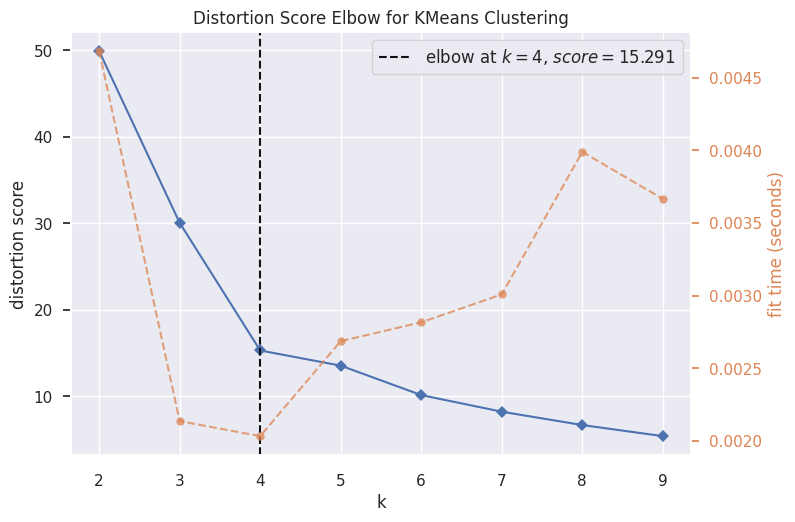

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(bounded_data_normalized)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(data_pca)
visualizer.show()

# **Cluster validation**

We'll use silhouete analysis to validate the clusters obtained, where we compute a value that represents how much a certain point belogns to a cluster or not. By calculating it for all points in a cluster an averaging it, we can estimate the validity of that cluster. To do so we use a sklearn function:

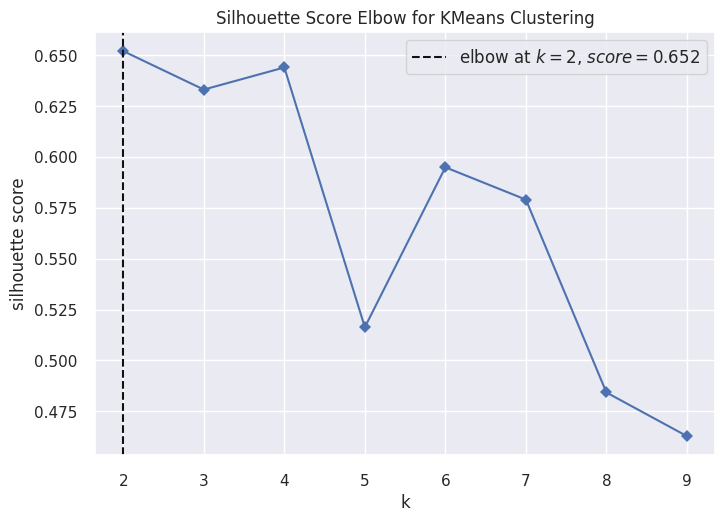

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from sklearn.metrics import silhouette_score
visualizer2 = KElbowVisualizer(model, metric='silhouette', timings=False, k=(2,10)) # a range of k values from 2 to 9
visualizer2.fit(data_pca)        # Fit the data to the visualizer
visualizer2.show()        # Finalize and render the figure

# **Data visualization**

First, we can observe the dataset divided into 4 clusters, as determined by the elbow method, and then compare it with the results obtained through cluster validation using the silhouette score.

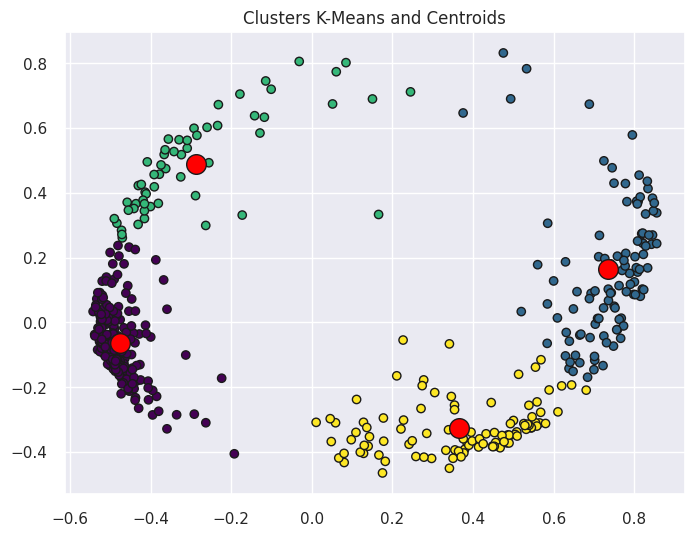

In [ ]:
clusterer = KMeans(n_clusters=4)
cluster_labels = clusterer.fit_predict(data_pca)
# show the actual clusters formed and centroids
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(data_pca[:, 0], data_pca[:, 1], cmap='viridis', c=clusterer.labels_, edgecolor="k")
# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw red circles at cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker="o", c="red", s=200, edgecolor="k")

plt.title('Clusters K-Means and Centroids')
plt.show()

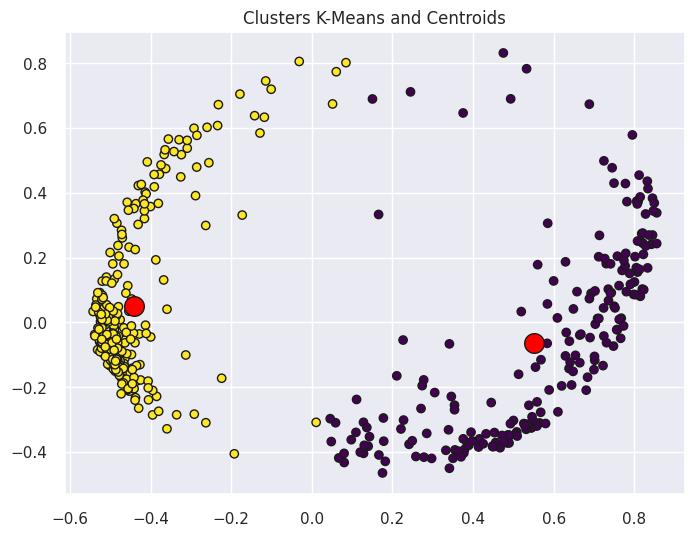

In [ ]:
import matplotlib.pyplot as plt

clusterer = KMeans(n_clusters=2)
cluster_labels = clusterer.fit_predict(data_pca)

plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(data_pca[:, 0], data_pca[:, 1], cmap='viridis', c=clusterer.labels_, edgecolor="k")

centers = clusterer.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker="o", c="red", s=200, edgecolor="k")

plt.title('Clusters K-Means and Centroids')
plt.show()
